##### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/kaggle/input/ford-car-price-prediction/ford.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
#EDA - for output feature ie. Price 

In [ ]:
sns.histplot(df['price'] , kde=True , bins=50)

In [ ]:
import warnings 
warnings.filterwarnings('ignore') //To ignore unwanted warnings

In [ ]:
# Now the coorelation between columns to check if how many input columns are related more with output column

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
# relation between features

In [ ]:
sns.boxplot(data=df , x='year', y='price')
plt.xticks(rotation=90)
# you can see these features have invert realtion btw them ie. one goes up so the other goes down

In [ ]:
sns.scatterplot(data=df , x='mileage' , y='price')

In [ ]:
sns.boxplot(data=df , x='engineSize',y='price')
#Mix but still strong relationship

In [ ]:
# These all cols upside have strong relation with 'price' so we will use them to train the model

<Axes: xlabel='transmission', ylabel='price'>

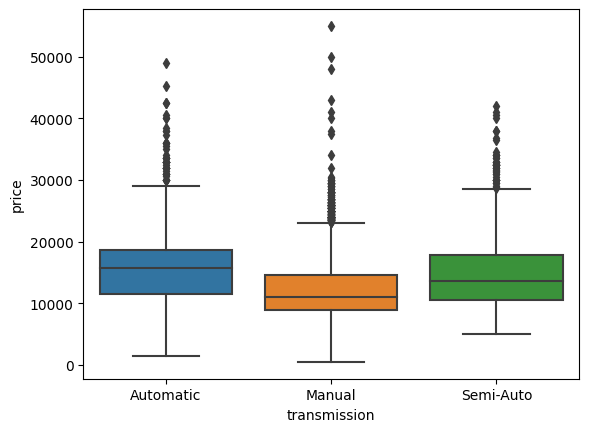

In [31]:
sns.boxplot(data=df , x='transmission' , y='price')

In [32]:
# we have seen that this col was not present in corr matrix but still it has good relation with output variable

In [33]:
#so we can encode this type of feature with encoded form

<Axes: xlabel='fuelType', ylabel='price'>

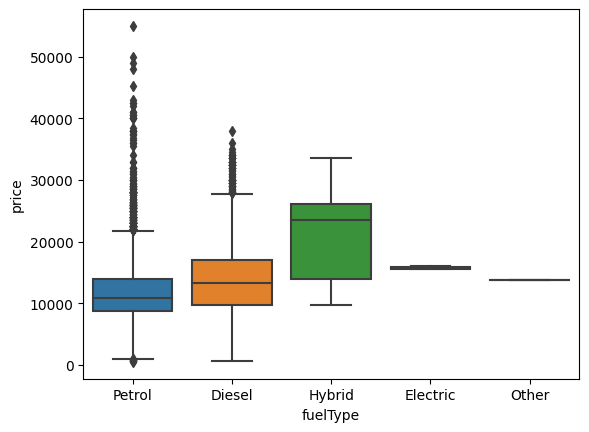

In [34]:
sns.boxplot(data=df , x='fuelType' ,y='price')

In [35]:
# so fuelType feature is disputed as it is related somewhere not so surely

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

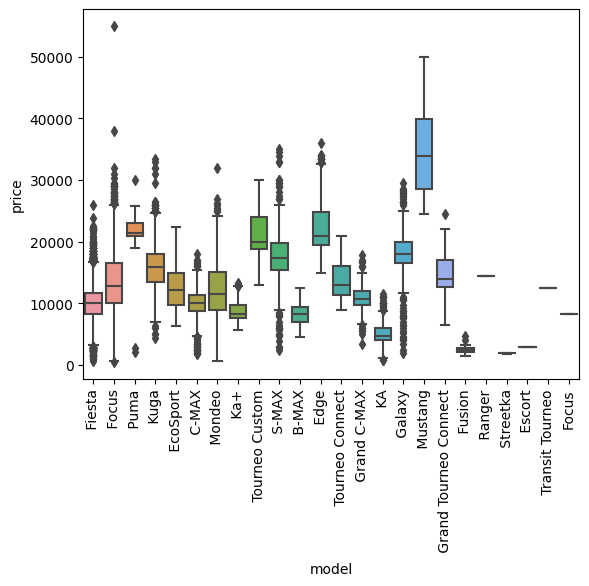

In [38]:
sns.boxplot(data=df , x='model' ,y='price')
plt.xticks(rotation = 90)

In [39]:
#so model feature is also usable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

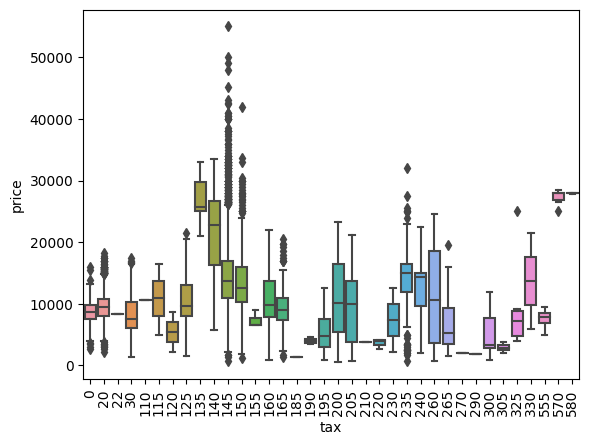

In [41]:
sns.boxplot(data=df , x='tax' ,y='price')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, '20.8'),
  Text(1, 0, '20.9'),
  Text(2, 0, '22.1'),
  Text(3, 0, '22.6'),
  Text(4, 0, '22.8'),
  Text(5, 0, '23.5'),
  Text(6, 0, '23.7'),
  Text(7, 0, '23.9'),
  Text(8, 0, '24.8'),
  Text(9, 0, '26.3'),
  Text(10, 0, '27.4'),
  Text(11, 0, '28.0'),
  Text(12, 0, '28.3'),
  Text(13, 0, '28.5'),
  Text(14, 0, '28.8'),
  Text(15, 0, '29.1'),
  Text(16, 0, '29.4'),
  Text(17, 0, '30.1'),
  Text(18, 0, '30.4'),
  Text(19, 0, '30.7'),
  Text(20, 0, '31.0'),
  Text(21, 0, '31.4'),
  Text(22, 0, '31.7'),
  Text(23, 0, '32.1'),
  Text(24, 0, '32.5'),
  Text(25, 0, '32.8'),
  

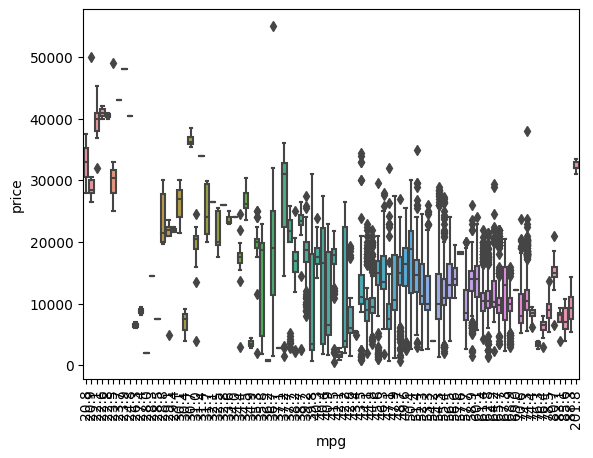

In [42]:
sns.boxplot(data=df , x='mpg' ,y='price')
plt.xticks(rotation = 90)

In [44]:
#dont know if mpg is usable coz there are lots of vales to be considered

In [45]:
# now its about to train the model and find figures

In [90]:
x = df.drop('price' , axis=1)

In [91]:
y= df['price']

In [92]:
x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [96]:
#encode categorial features
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [97]:
x_1h =pd.get_dummies(x , columns=['model' , 'transmission' ,'fuelType']  , drop_first=True)
x_1h

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [135]:
x_1h =x_encoded_1h.astype(int)

In [136]:
x_1h

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [137]:
#label_encoding
from sklearn.preprocessing import LabelEncoder


In [138]:
cols = ['model','transmission','fuelType']

x_lb = x.copy()

In [139]:
from sklearn.preprocessing import LabelEncoder

lencoders = {}

for i in cols:
    # clean values
    x_lb[i] = x_lb[i].astype(str).str.strip().str.lower()
    
    # only encode if >1 unique value
    if x_lb[i].nunique() > 1:
        le = LabelEncoder()
        x_lb[i] = le.fit_transform(x_lb[i])
        lencoders[i] = le
    else:
        print(f"Skipping {i} (only one unique value)")


for col in x_lb.columns:
    if str(x_lb[col].dtype) == "object":
        x_lb[col] = x_lb[col].astype(int)


In [140]:
lencoders

{'model': LabelEncoder(),
 'transmission': LabelEncoder(),
 'fuelType': LabelEncoder()}

In [141]:
# now scaling the features

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
num_cols = ['year' , 'mileage' ,'tax','mpg','engineSize'] # in x_1h df all values are encoded into 0 and 1 except these ones

In [144]:
scaler = StandardScaler()
x_1h[num_cols] = scaler.fit_transform(x_1h[num_cols])

In [145]:
x_1h

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [146]:
# x_lb all cols are numerically encoded but non scaled so do for all
x_lb.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_lb[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']] = scaler.fit_transform(x_lb[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']])


In [148]:
x_lb

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460671,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211336,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211336,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460671,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460671,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.707343,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.707343,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211336,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.035336,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


In [149]:
# training both type of encoded data

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [153]:
X_train, X_test, y_train, y_test = train_test_split(x_1h, y, test_size=0.33, random_state=42)

In [156]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [158]:
y_pred = model.predict(X_test)

In [159]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [160]:
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544226])

In [161]:
r2 = r2_score(y_test , y_pred)

In [162]:
r2

0.8396626991294074

In [163]:
#adjusted r2

In [164]:
n = X_test.shape[0]
p = X_test.shape[1]
ad_r2 = 1-((1-r2) * (n-1))/(n-p-1)
ad_r2

0.8387377808685319

In [165]:
# for lb encoded x
X_train, X_test, y_train, y_test = train_test_split(x_lb, y, test_size=0.33, random_state=42)

In [166]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [167]:
y_pred = model.predict(X_test)

In [168]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [169]:
y_pred

array([ 6158.08857412,  9286.53322923,  9519.53006154, ...,
       19580.89396648,  7382.98318239,  9960.16716707])

In [170]:
r2 = r2_score(y_test , y_pred)

In [171]:
r2

0.7310239287853537

In [172]:
n = X_test.shape[0]
p = X_test.shape[1]
ad_r2 = 1-((1-r2) * (n-1))/(n-p-1)
ad_r2

0.7306604476080366

In [173]:
# so we can see both in r2 and ad_r2 were good when we encoded features with one hot encoding